In [58]:
import sys
import numpy as np
import pandas as pd
from plotnine import *
from plotnine import __version__ as p9__version__
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import __version__ as sk__version__

print("python", sys.version,
      "\nnumpy", np.__version__,
      "\npandas", pd.__version__,
      "\nplotnine", p9__version__,
      "\nstatsmodels", sm.__version__,
      "\nsklearn", sk__version__)

python 3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)] 
numpy 1.22.3 
pandas 1.4.2 
plotnine 0.8.0 
statsmodels 0.13.2 
sklearn 1.1.1


In [59]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [105]:
def opera_to_df(input):
    # Import Raw
    raw_df = pd.read_csv(input, sep = '\t', skiprows = 9)
    raw_df = raw_df.dropna(axis = 'columns')
    return raw_df

In [106]:
coloc_set = opera_to_df('real_data/Objects_Population - coloc_wt_plus.csv')
coloc_set = coloc_set.sort_values(by = ['coloc - Spot Contrast'], ascending = False)
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [107]:
pos_column_1 = [0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,1]
pos_column_2 = [1,1,1,0,0,1,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,0]
pos_column_3 = [0,0,1,0,1,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0]
pos_column_4 = [1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0]
pos_column_5 = [0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1]

pos_combined = pos_column_1 + pos_column_2 + pos_column_3 + pos_column_4 + pos_column_5
print(len(pos_combined))

188


In [108]:
n_pos_rest = len(coloc_set) - len(pos_combined)
pos_rest = [0 for i in range(n_pos_rest)]

pos_combined_full = pos_combined + pos_rest

In [109]:
coloc_set['true colocalization'] = pos_combined_full

In [110]:
coloc_set[188:212]

,Row,Column,Plane,Timepoint,Field,Object No,X,Y,Bounding Box,Position X [µm],Position Y [µm],coloc - Spot Contrast,coloc - Spot Area [px²],coloc - Spot To Region Intensity,coloc - Object No in Nuclei Selected,coloc - Object No in Spots AR,true colocalization
244,4,8,7,64,4,2,250,1039,"[247,1037,253,1043]",523.18,-962.85,0.070276,33,0.818996,21,20,0
43,4,8,1,32,5,1,1616,626,"[1612,622,1619,632]",-243.70,-901.85,0.070261,60,1.011605,6,4,0
94,4,8,4,36,5,1,650,276,"[646,274,655,280]",-386.32,-850.09,0.070212,42,1.257266,8,10,0
7,4,8,3,34,3,1,1294,953,"[1290,950,1298,958]",677.46,-304.42,0.070186,41,1.021859,6,2,0
230,4,8,7,43,5,1,1884,2156,"[1882,2154,1886,2158]",-204.02,-1127.87,0.069883,18,0.974760,3,1,0
239,4,8,1,51,4,1,1351,1261,"[1349,1259,1354,1267]",685.98,-995.79,0.069861,42,0.949460,6,10,0
339,4,8,2,40,1,1,789,1634,"[785,1630,793,1639]",-365.82,-404.89,0.069822,51,1.047000,2,2,0
49,4,8,2,57,9,1,149,4,"[146,0,153,7]",508.31,-1455.47,0.069813,32,1.271760,1,2,0
189,4,8,1,60,5,2,1535,849,"[1532,846,1541,853]",-255.41,-934.72,0.069767,44,1.379390,9,13,0
164,4,8,2,59,5,1,1545,854,"[1542,849,1549,861]",-253.97,-935.50,0.069744,71,1.244014,3,6,0


              precision    recall  f1-score   support

           0       0.90      0.95      0.92       264
           1       0.81      0.69      0.75        87

    accuracy                           0.88       351
   macro avg       0.86      0.82      0.83       351
weighted avg       0.88      0.88      0.88       351



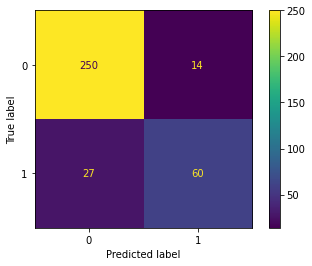

In [67]:
y = coloc_set['true colocalization']
X = coloc_set[['coloc - Spot Contrast', 'coloc - Spot Area [px²]', 'coloc - Spot To Region Intensity']]

c = tree.DecisionTreeClassifier(max_depth = 3)
m = c.fit(X,y)

p = m.predict(X)

print(classification_report(y,p))
ConfusionMatrixDisplay.from_predictions(y, p)

In [68]:
import graphviz
import os

os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'  # SETUP PATH VARIABLE

dot_data = tree.export_graphviz(m, feature_names = X.columns.array, class_names = ['pos', 'neg'],
                                impurity = False, node_ids = False)
graphviz.Source(dot_data)

graph = graphviz.Source(dot_data)
graph.render('m')


'm.pdf'

In [69]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [70]:
c_rf = RandomForestClassifier(n_estimators = 10, max_features = 1)
m_rf = c_rf.fit(X, y)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       264
           1       0.99      0.95      0.97        87

    accuracy                           0.99       351
   macro avg       0.99      0.98      0.98       351
weighted avg       0.99      0.99      0.99       351



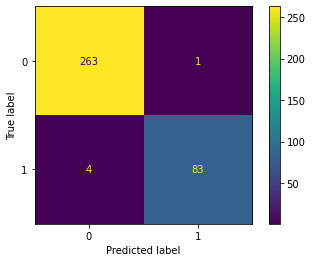

In [71]:
p_rf = m_rf.predict(X)

print(classification_report(y,p_rf))
ConfusionMatrixDisplay.from_predictions(y, p_rf)

In [166]:
coloc_set_minus = opera_to_df('real_data/Objects_Population - coloc_wt_minus.csv')
zero_set = [0 for i in range(len(coloc_set_minus))]
coloc_set_minus['true colocalization'] = zero_set
X = coloc_set_minus[['coloc - Spot Contrast', 'coloc - Spot Area [px²]', 'coloc - Spot To Region Intensity']]

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1558
           1       0.00      0.00      0.00         0

    accuracy                           0.87      1558
   macro avg       0.50      0.44      0.47      1558
weighted avg       1.00      0.87      0.93      1558



c:\Users\Student\Desktop\LocalEnvs\localenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
c:\Users\Student\Desktop\LocalEnvs\localenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
c:\Users\Student\Desktop\LocalEnvs\localenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


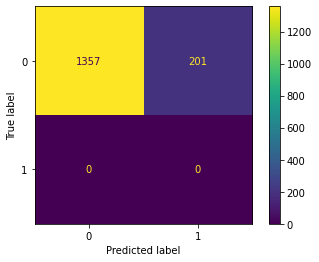

In [167]:
predictions = m.predict(X)
coloc_set_minus['pred_pos'] = predictions

print(classification_report(zero_set,p))
ConfusionMatrixDisplay.from_predictions(zero_set, p)

In [96]:
coloc_set_minus = coloc_set_minus.sort_values(by = ['pred_pos'], ascending = False)
print(len(coloc_set_minus))
print((np.sum(predictions)))

1558
338


c:\Users\Student\Desktop\LocalEnvs\localenv\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 51 rows containing missing values.


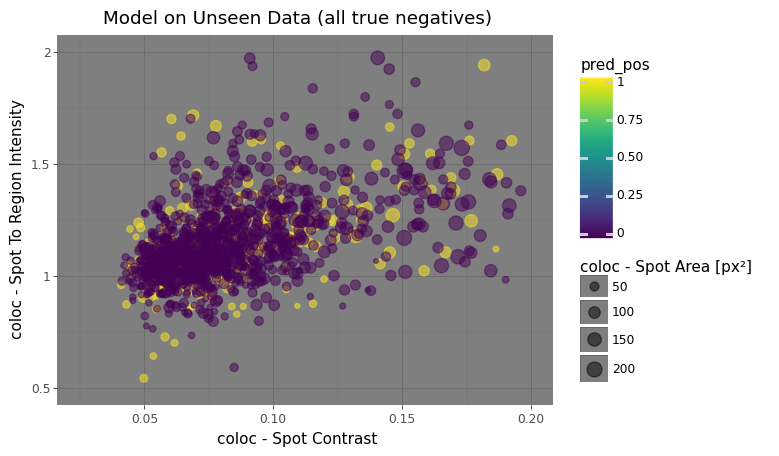

<ggplot: (160769412709)>

In [150]:
q = ggplot(coloc_set_minus, aes('coloc - Spot Contrast', 'coloc - Spot To Region Intensity',
        color = 'pred_pos', size = 'coloc - Spot Area [px²]')) + \
    geom_point(alpha = 0.5) + xlim(0.025, 0.2) + ylim(0.5, 2) + \
    ggtitle('Model on Unseen Data (all true negatives)') + \
    theme_dark()
q

c:\Users\Student\Desktop\LocalEnvs\localenv\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


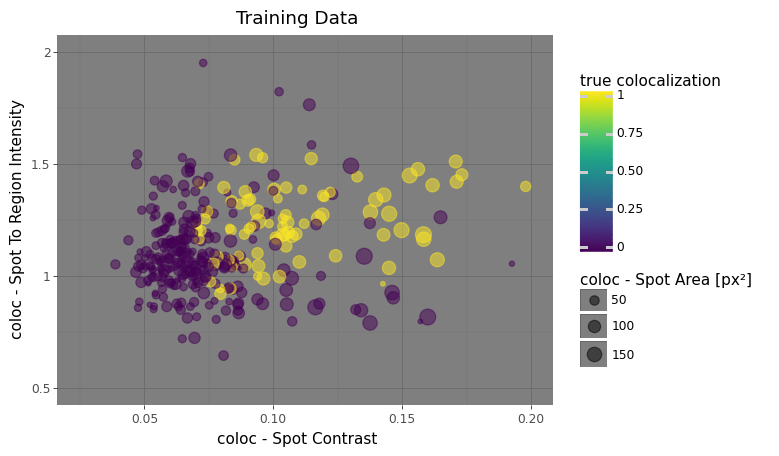

<ggplot: (160775003554)>

In [148]:
p = ggplot(coloc_set, aes('coloc - Spot Contrast', 'coloc - Spot To Region Intensity',
        color = 'true colocalization', size = 'coloc - Spot Area [px²]'))+ \
    geom_point(alpha = 0.5) + xlim(0.025, 0.2) + ylim(0.5, 2) + \
    ggtitle('Training Data') + theme_dark()
p

In [ ]:
'coloc - Spot Area [px²]', 'coloc - Spot To Region Intensity'

In [151]:
from sklearn.neural_network import MLPClassifier

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       264
           1       0.71      0.48      0.58        87

    accuracy                           0.82       351
   macro avg       0.78      0.71      0.73       351
weighted avg       0.81      0.82      0.81       351



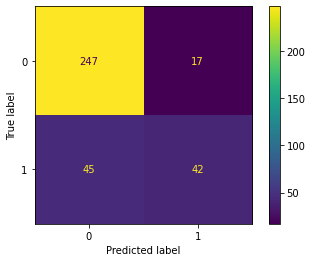

In [160]:
y = coloc_set['true colocalization']
X = coloc_set[['coloc - Spot Contrast', 'coloc - Spot Area [px²]', 'coloc - Spot To Region Intensity']]

NN = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (15,2), random_state = 1)
NN.fit(X,y)
p = NN.predict(X)

print(classification_report(y,p))
ConfusionMatrixDisplay.from_predictions(y, p)


In [165]:
Xt = coloc_set_minus[['coloc - Spot Contrast', 'coloc - Spot Area [px²]', 'coloc - Spot To Region Intensity']]
p = NN.predict(Xt)

print((len(Xt)-sum(p))/len(Xt) * 100)


87.09884467265725


In [171]:
coloc_set_c4 = opera_to_df('real_data/Objects_Population - coloc_c4_plus.csv')
coloc_set_c4[:5]

,Row,Column,Plane,Timepoint,Field,Object No,X,Y,Bounding Box,Position X [µm],Position Y [µm],coloc - Relative Spot Intensity,coloc - Spot Contrast,coloc - Spot Area [px²],coloc - Spot to Region Intensity,coloc - Object No in Nuclei population,coloc - Object No in Spots PCNA,coloc - Object No in Spots PCNA Selected
0,4,5,3,61,2,1,1014,2122,"[1008,2118,1018,2126]",-1301.46,-477.05,0.104255,0.216410,73,1.152053,51,197,48
1,4,5,7,35,6,1,1213,538,"[1209,534,1218,543]",-1271.90,-888.70,0.180963,0.310364,72,0.706556,78,3819,1536
2,4,5,5,35,4,1,244,64,"[239,59,248,69]",522.23,-818.65,0.180232,0.307952,69,1.313181,1,27,19
3,4,5,8,56,2,1,2081,760,"[2078,757,2088,765]",-1143.30,-275.83,0.121913,0.338310,61,0.607149,21,227,105
4,4,5,8,56,2,2,669,2089,"[664,2084,674,2094]",-1352.31,-472.14,0.306888,0.496624,81,0.979536,114,2173,845


In [174]:

X = coloc_set_c4[['coloc - Spot Contrast', 'coloc - Spot Area [px²]', 'coloc - Spot To Region Intensity']]
p = m.predict(X)

KeyError: "['coloc - Spot To Region Intensity'] not in index"